# Customer to road network-assignment

In [11]:
%%html
<style>
table {float:left}
</style>

| Document info | |
| --- | --- | 
| Area of interest: | Singapore |
| Prepared by: | Waste Labs (wastelabs.co) |
| Prepared for: | Demonstration purposes |
| Contact: | info@wastelabs.co |

In [66]:
%reload_kedro
%load_ext autoreload
%autoreload 2
%config IPCompleter.use_jedi = False

import pandas as pd

# Extra options
# Extra options
pd.options.display.max_rows = 250
pd.options.display.max_columns = 250

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import logging

logging.basicConfig(level=logging.INFO)

import importlib
import os
import sys

import geopandas as gpd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
from geopandas.tools import sjoin
from GPSOdyssey import Kepler
from IPython.display import clear_output
from ipywidgets import fixed, interact, interact_manual, interactive
from shapely import wkt

2022-04-05 22:58:29,775 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-04-05 22:58:29,865 - root - INFO - ** Kedro project Demand estimation and waste collection routing optimisation for the City of Cape Town
2022-04-05 22:58:29,867 - root - INFO - Defined global variable `context`, `session` and `catalog`
2022-04-05 22:58:29,877 - root - INFO - Registered line magic `run_viz`
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
from mcarptif.osmnx_network_extract.network_code_garp import (
    NetworkCode,
    create_gdf,
    create_latlon_gdf,
    customer_network_plot,
    return_crs,
)

In [67]:
prep_network = catalog.load("road_network_simplified_24645_edges_xy_directed")
prep_network_plot = catalog.load("road_network_simplified_24645_edges_directed")

2022-04-05 22:59:54,952 - kedro.io.data_catalog - INFO - Loading data from `road_network_simplified_24645_edges_xy_directed` (GeoJSONDataSet)...
2022-04-05 22:59:56,068 - kedro.io.data_catalog - INFO - Loading data from `road_network_simplified_24645_edges_directed` (GeoJSONDataSet)...


In [20]:
producer_file = catalog.load("population_sample")

2022-04-05 22:38:34,001 - kedro.io.data_catalog - INFO - Loading data from `population_sample` (GeoJSONDataSet)...


<AxesSubplot:>

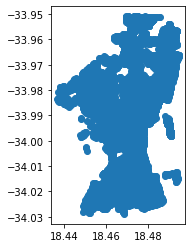

In [22]:
producer_file.plot()

In [26]:
df_producer_geo = producer_file.to_crs("EPSG:3414")

In [62]:
df_producer_geo

id    income carAccess dwellingTenure housingType  \
0       129594       0.0       Yes   OwnedPaidOff       House   
1       129597   19200.0       Yes         Rented       House   
2       129949  614400.0       Yes   OwnedPaidOff       House   
3       130038   76800.0        No       RentFree       House   
4       130108  153600.0       Yes   OwnedPaidOff       House   
...        ...       ...       ...            ...         ...   
13019  1372455   19200.0        No       RentFree       House   
13020  1372574  614400.0        No   OwnedPaidOff       House   
13021  1372659  614400.0       Yes    OwnedPaying       House   
13022  1372678  307200.0       Yes         Rented       House   
13023  1372734   76800.0        No         Rented       House   

        mainDwellingType  numberOfDwellingRooms      pipedWater  \
0              Apartment                      5  Piped_dwelling   
1              Apartment                      4  Piped_dwelling   
2            FormalHouse                      9  Piped_dwelling   
3                  Other                      4  Piped_dwelling   
4              Apartment                      4  Piped_dwelling   
...                  ...                    ...             ...   
13019              Other                      1      Piped_yard   
13020  SemiDetachedHouse                      5  Piped_dwelling   
13021        FormalHouse                      5  Piped_dwelling   
13022          Apartment                      4  Piped_dwelling   
13023          Apartment                      4  Piped_dwelling   

               toilet  parcelLon  parcelLat  parcelX  parcelY  \
0      Flush_sewerage  18.468865 -33.963798   -49090 -3759773   
1      Flush_sewerage  18.476767 -33.954611   -48365 -3758750   
2      Flush_sewerage  18.470040 -33.998146   -48962 -3763582   
3      Flush_sewerage  18.472421 -34.006827   -48737 -3764544   
4      Flush_sewerage  18.481922 -33.984574   -47871 -3762071   
...               ...        ...        ...      ...      ...   
13019  Flush_sewerage  18.470073 -34.017305   -48948 -3765708   
13020  Flush_sewerage  18.467686 -33.987434   -49185 -3762395   
13021  Flush_sewerage  18.448937 -33.979932   -50922 -3761572   
13022  Flush_sewerage  18.477643 -33.952695   -48285 -3758537   
13023  Flush_sewerage  18.461279 -34.010693   -49764 -3764978   

       parcelDistanceFromOriginal                           geometry  \
0                           49709  POINT (-7477751.013 -9355638.156)   
1                           49267  POINT (-7479351.355 -9354102.596)   
2                           53729  POINT (-7471055.931 -9356406.129)   
3                           55183  POINT (-7469316.368 -9356263.335)   
4                           51489  POINT (-7473413.518 -9354106.547)   
...                           ...                                ...   
13019                       21641  POINT (-7467338.365 -9356934.521)   
13020                       24817  POINT (-7473189.452 -9356488.097)   
13021                       25421  POINT (-7475080.337 -9359311.384)   
13022                       28257  POINT (-7479703.101 -9353907.202)   
13023                       24417  POINT (-7468824.678 -9358171.047)   

             lon        lat  
0      18.468865 -33.963798  
1      18.476767 -33.954611  
2      18.470040 -33.998146  
3      18.472421 -34.006827  
4      18.481922 -33.984574  
...          ...        ...  
13019  18.470073 -34.017305  
13020  18.467686 -33.987434  
13021  18.448937 -33.979932  
13022  18.477643 -33.952695  
13023  18.461279 -34.010693  

[13024 rows x 17 columns]

In [27]:
df_producer_geo["lon"] = df_producer_geo["parcelLon"]
df_producer_geo["lat"] = df_producer_geo["parcelLat"]

### Customer locations

In [24]:
geocode_network = NetworkCode(prep_network, "SG", xy_converted=True)
geocode_network.set_arc_ids("arc_id", "geom_id_order")
geocode_network.convert_direct()

2022-04-05 22:39:06,963 - root - INFO - Convert network to x-y
2022-04-05 22:39:06,971 - root - INFO - Extracting nodes from network


/Users/ejwillemse/dev/waste_labs_dev/project_rdi_cpt/src/mcarptif/osmnx_network_extract/network_code_garp.py:65: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  df = gpd.GeoDataFrame(df, geometry=df['geometry'], crs=crs)


2022-04-05 22:39:07,390 - root - INFO - Removing opposing network arcs (only need one).
2022-04-05 22:39:07,409 - root - INFO - Arcs removed: 0.


In [28]:
geocode_network.add_customers(df_producer_geo)

2022-04-05 22:40:07,105 - root - INFO - Adding 13024 customers.


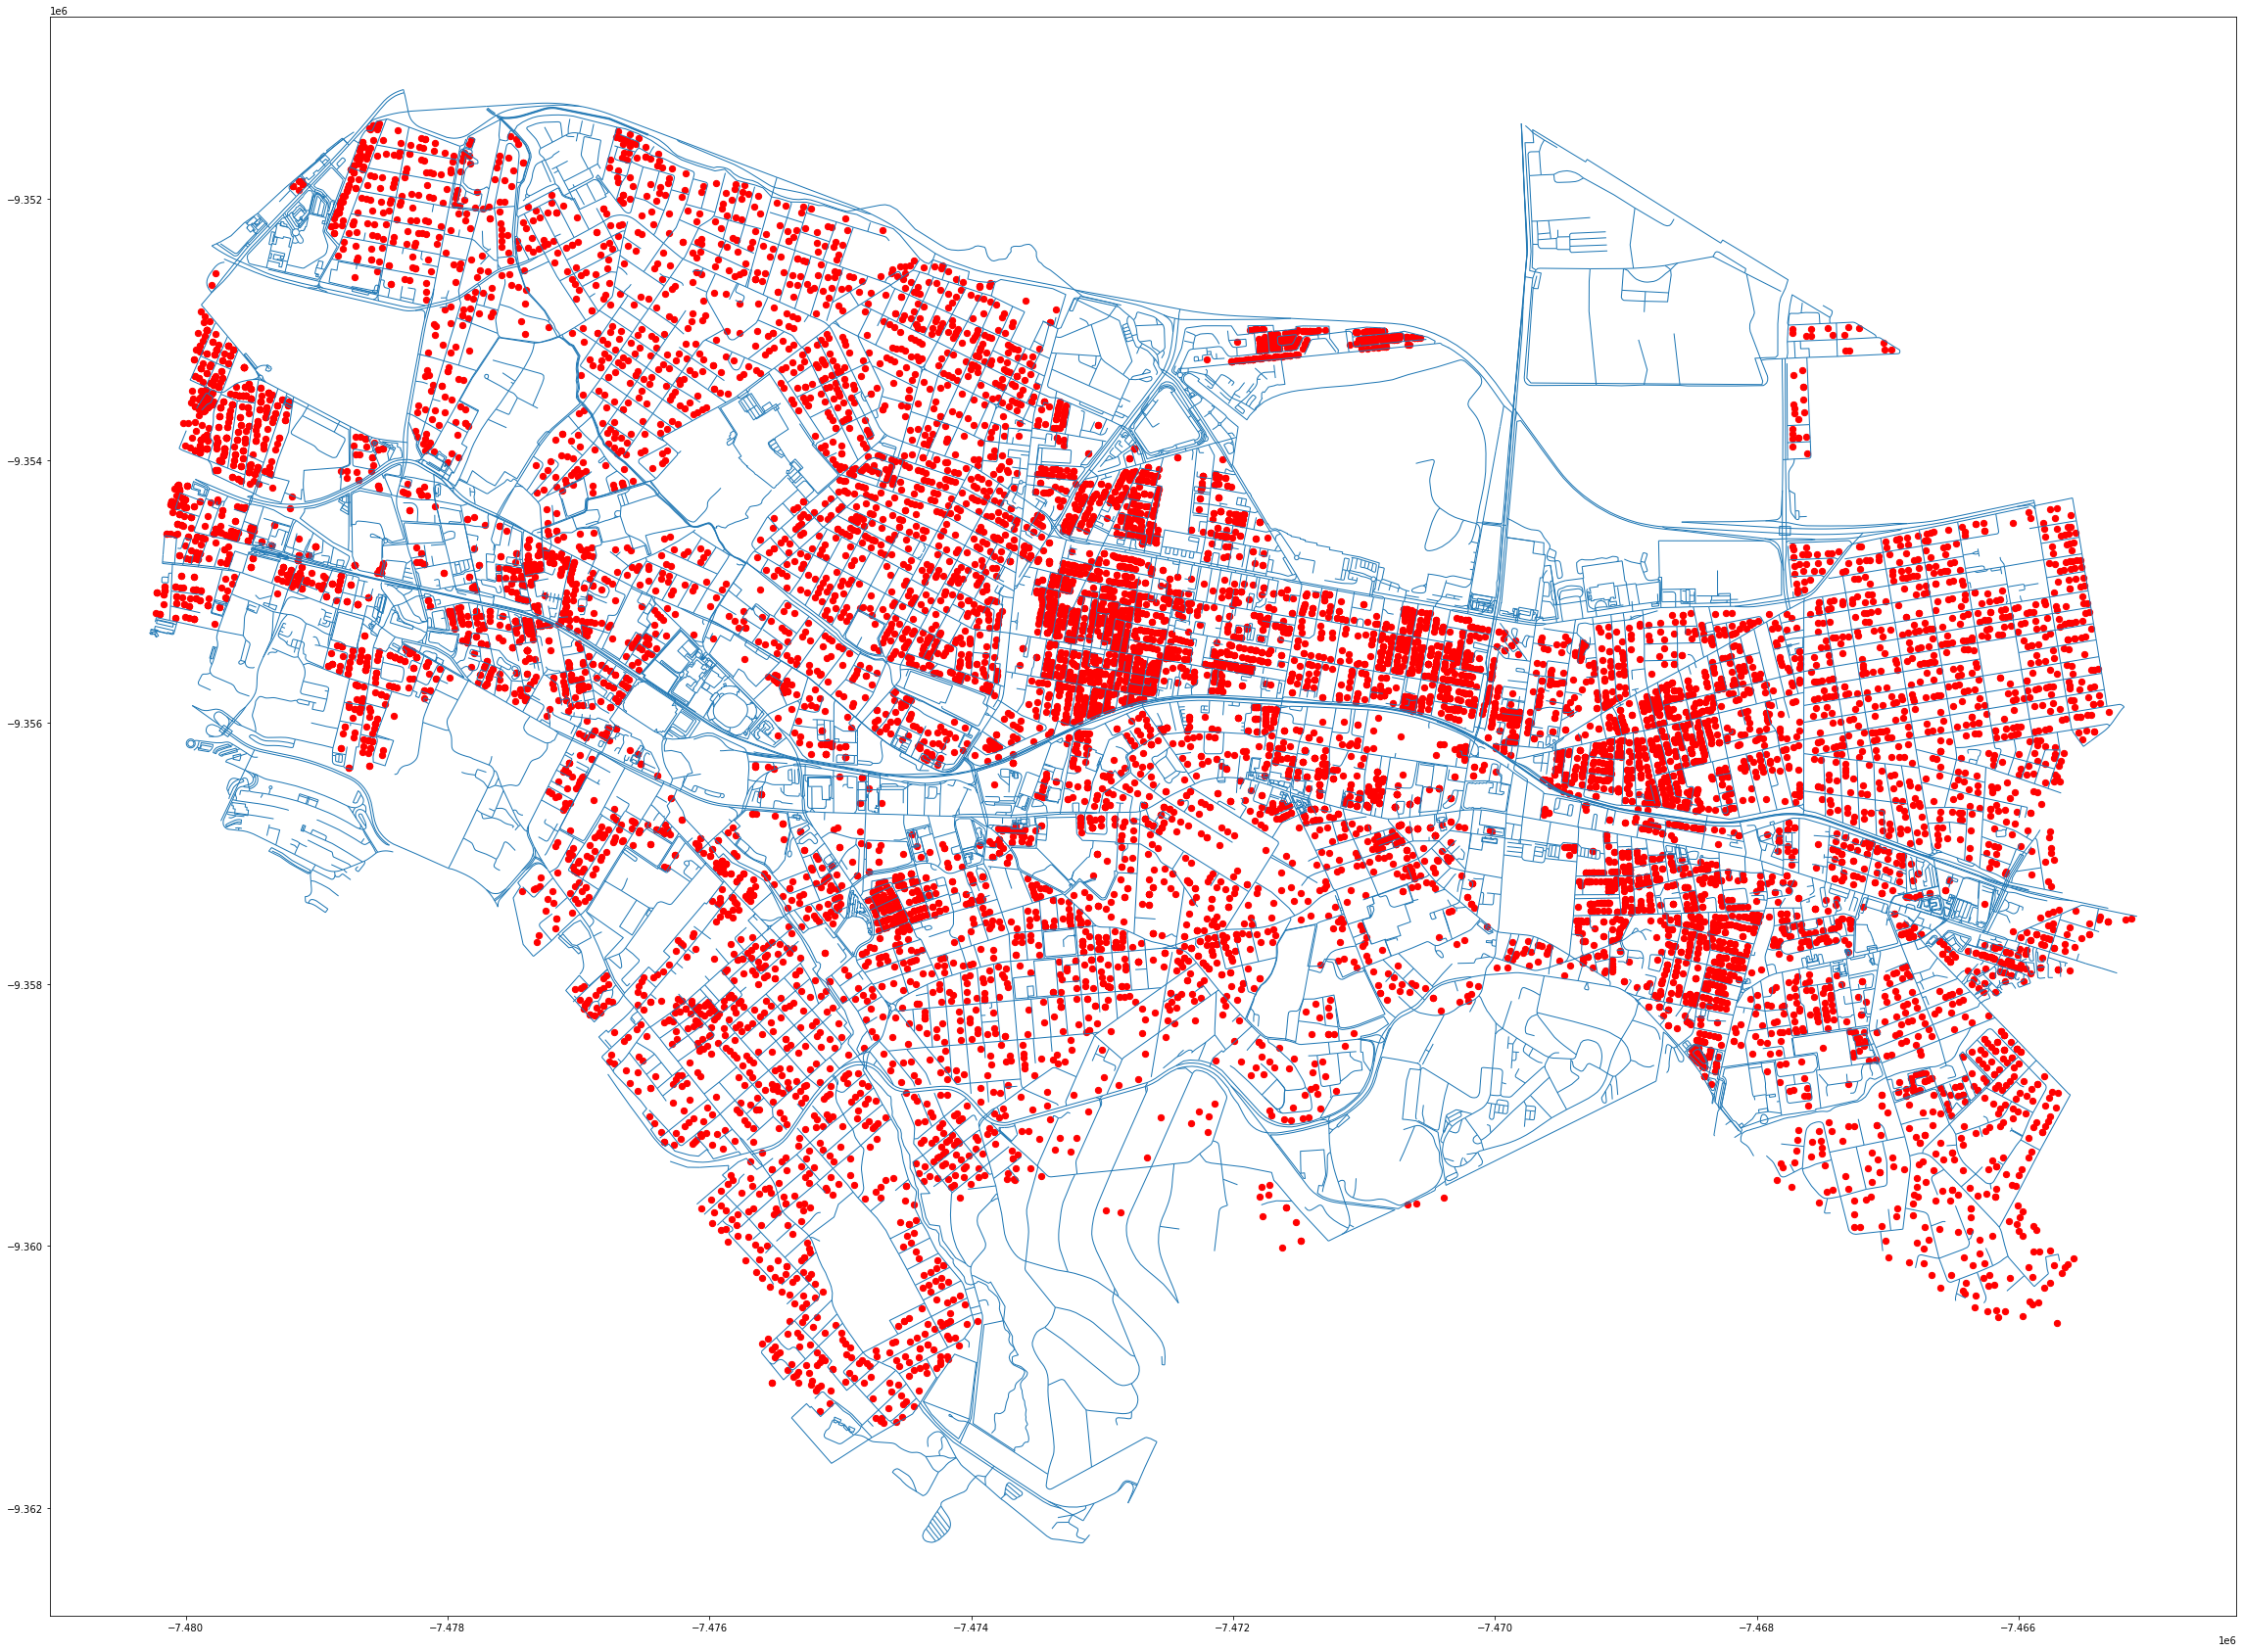

In [29]:
fig, ax = plt.subplots(figsize=(40, 40))
_ = geocode_network.df.plot(ax=ax, markersize=40, facecolor="red")
_ = geocode_network.df_network.plot(ax=ax, linewidth=1)

### Select road-types to use

In [32]:
road_select

['primary',
 'residential',
 'secondary',
 'service',
 'trunk',
 'trunk_link',
 'unclassified',
 None,
 'secondary_link',
 'tertiary',
 'motorway_link',
 'motorway',
 'primary_link',
 'tertiary_link',
 'service,residential',
 'service,living_street',
 'trunk,motorway',
 'residential,service',
 'living_street',
 'residential,unclassified',
 'secondary,trunk_link',
 'residential,living_street']

In [90]:
prep_network["highway"] = prep_network["highway"].astype(str)
geocode_network.df_network["highway"] = geocode_network.df_network["highway"].astype(str)

In [91]:
road_select = list(prep_network["highway"].unique())
road_select.sort()
road_select.insert(0, "ALL")

multiple_prod_select = widgets.SelectMultiple(
    options=road_select,
    description="Road type:",
    #    value = ["['service', 'residential']",
    # 'service'],
    rows=20,
    disabled=False,
)


@interact
def filter_producers(descriptions=multiple_prod_select):
    global highway_select
    highway_select = descriptions
    if "ALL" not in highway_select:
        geocode_network.filter_network(
            filter_values=list(highway_select),
        )
    else:
        geocode_network.filter_network(
            filter_values=list(prep_network["highway"].unique())
        )
    geocode_network.df_network_filter = geocode_network.df_network_filter.set_index(
        ["u", "v", "key"]
    )

interactive(children=(SelectMultiple(description='Road type:', options=('ALL', 'None', 'living_street', 'motor…

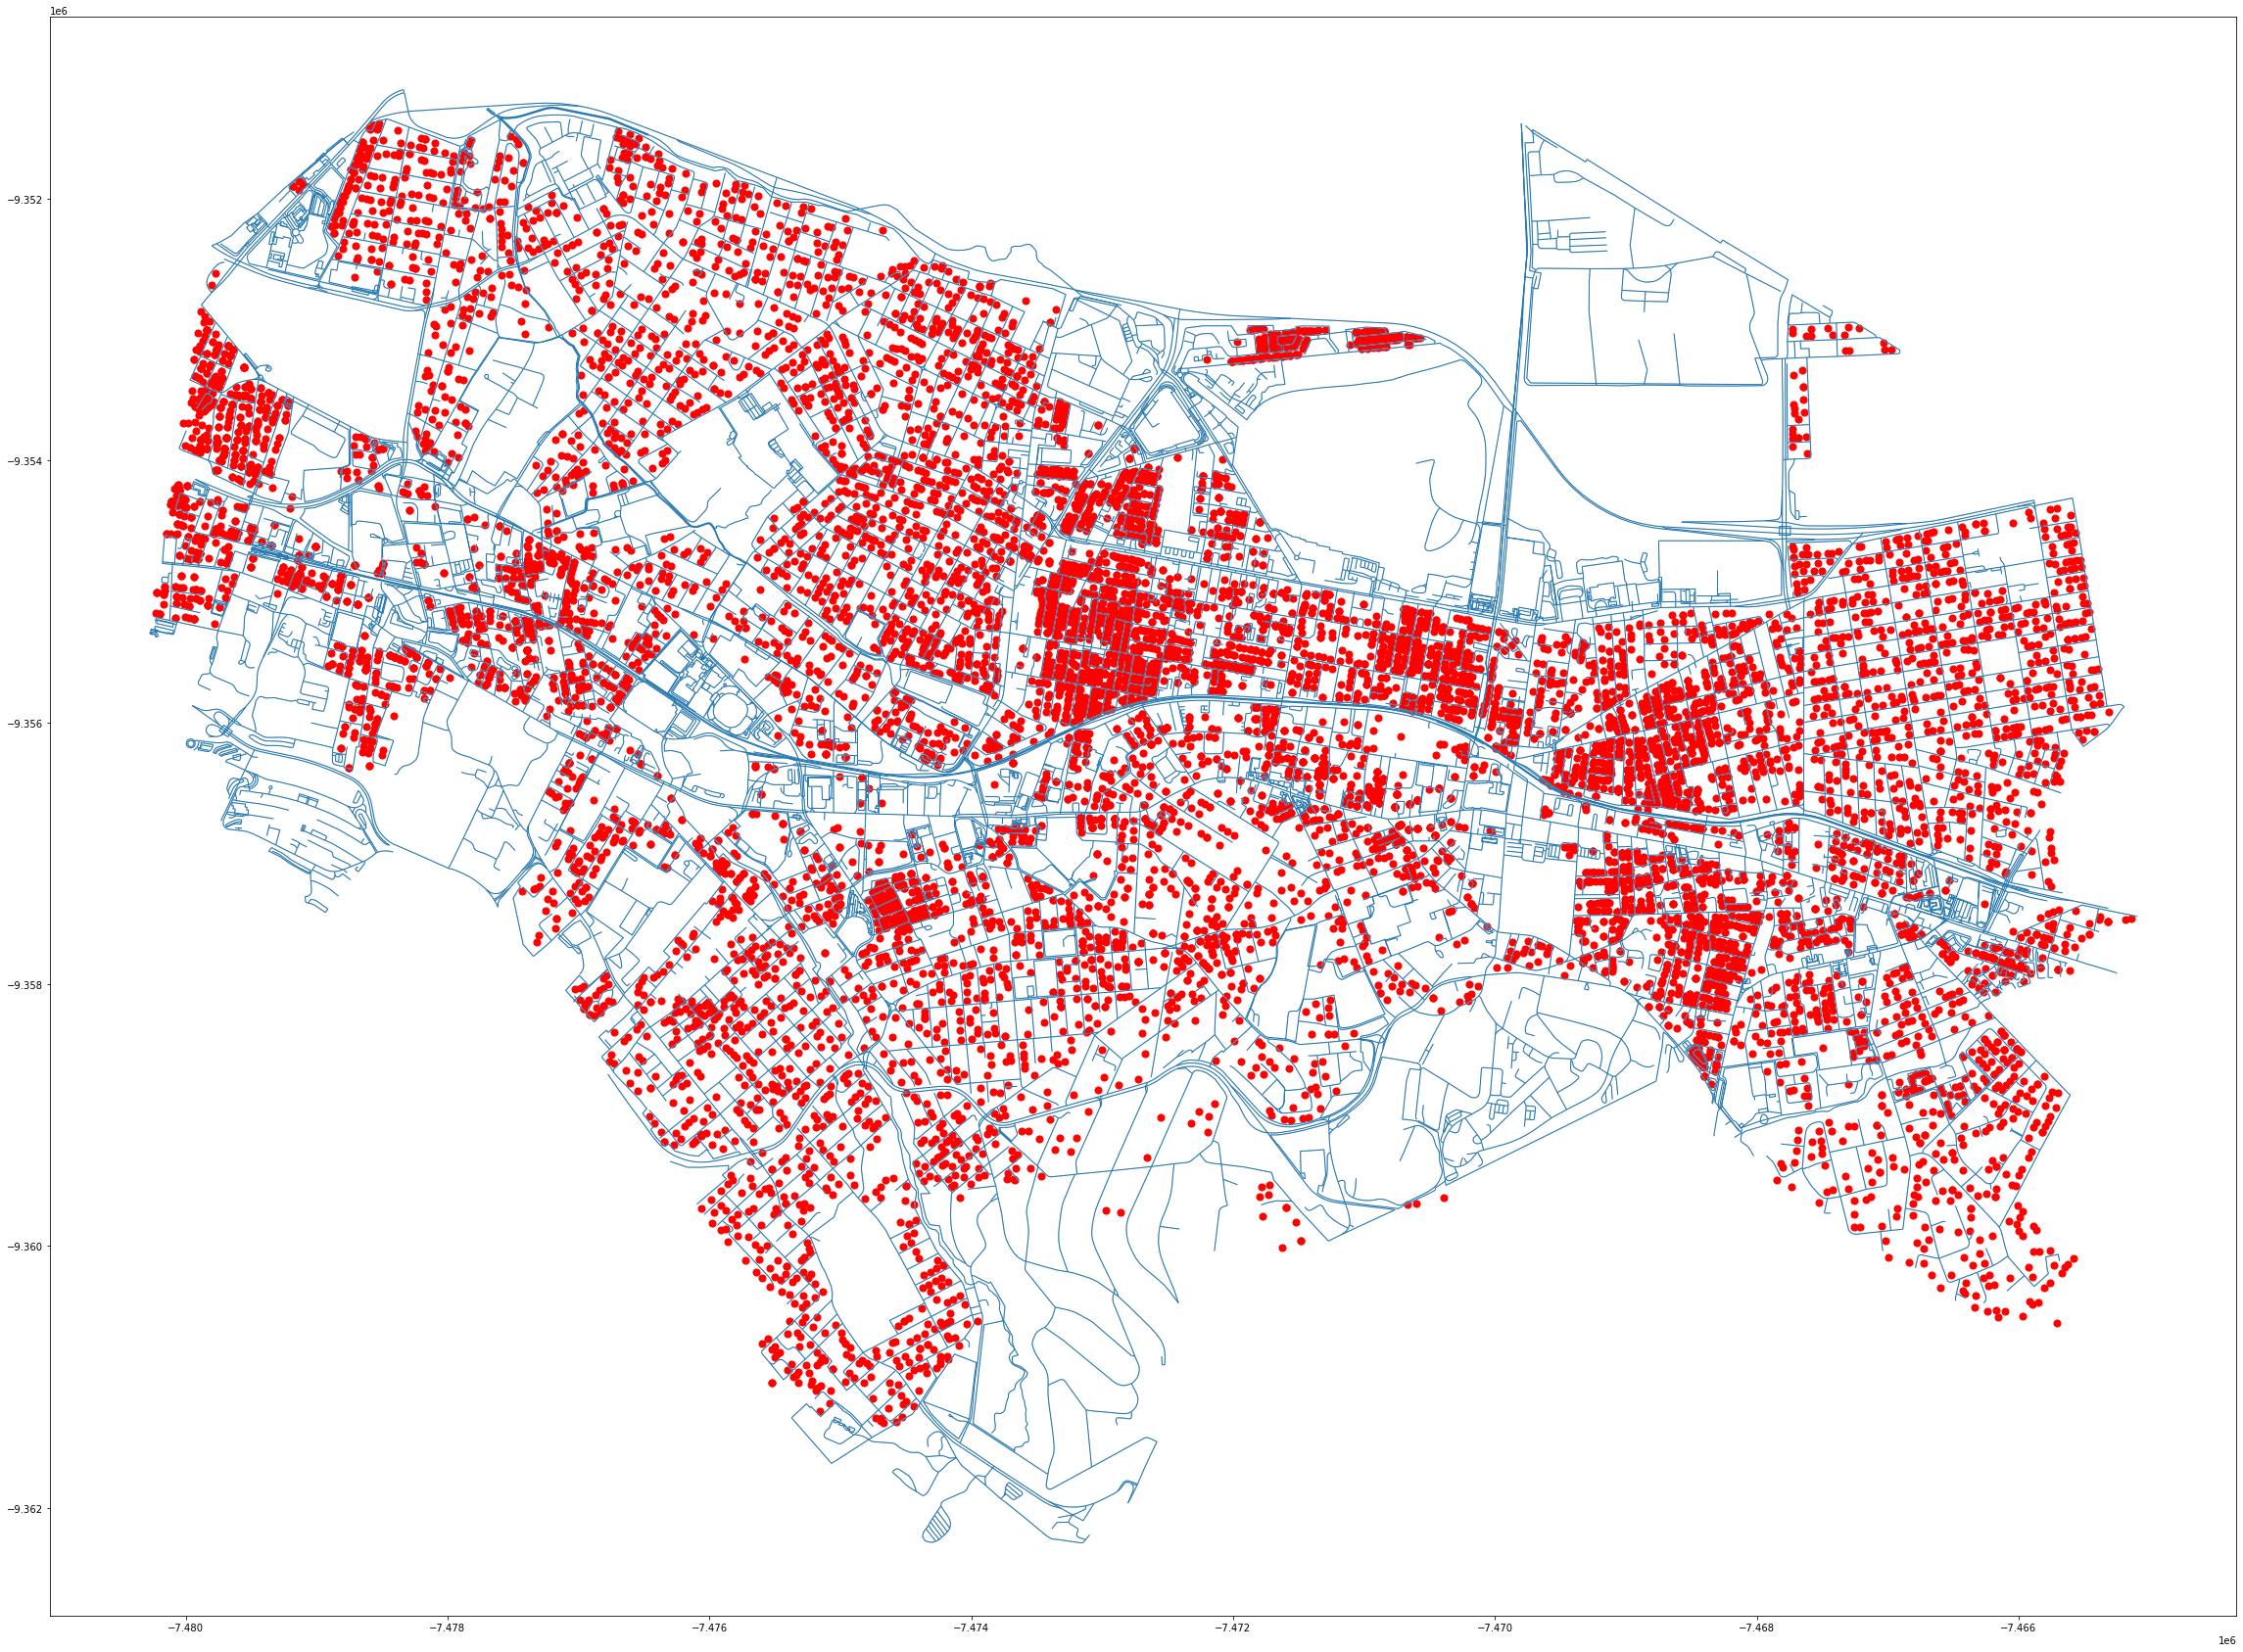

In [92]:
fig, ax = plt.subplots(figsize=(40, 40))
_ = geocode_network.df.plot(ax=ax, markersize=50, facecolor="red")
_ = geocode_network.df_network.plot(ax=ax, linewidth=1, color="lightgrey")
_ = geocode_network.df_network_filter.plot(ax=ax, linewidth=1)

In [93]:
geocode_network.find_nearest_collection_point()
geocode_network.merge_network()
geocode_network.convert_geometries_latlon()

2022-04-05 23:22:02,089 - root - INFO - Find nearest arc
2022-04-05 23:22:02,091 - root - INFO - Number of arcs 11173 number of points 13024


/Users/ejwillemse/opt/anaconda3/envs/python_RD/lib/python3.8/site-packages/osmnx/distance.py:455: UserWarning: The `get_nearest_edges` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_edges` instead.
  warnings.warn(msg)


2022-04-05 23:22:06,855 - root - INFO - Find closest assigned end point
2022-04-05 23:22:07,736 - root - INFO - Find closest point on assigned arc
2022-04-05 23:22:18,218 - root - INFO - Find best collection point
2022-04-05 23:22:18,263 - root - INFO - Adding arc attributes.
2022-04-05 23:22:18,298 - root - INFO - Convert geometries to lat-lon


In [94]:
df_customer_fit = geocode_network.df_collection_points
plt_map = df_customer_fit[
    [
        "lon",
        "lat",
        "lon_collect",
        "lat_collect",
        "dist_collect",
        "arc_collect",
        "id",
        "housingType",
        "highway",
        "arc_id",
        "oneway",
    ]
].copy()
plt_map = plt_map.fillna("")
kep_map = Kepler(
    data={"customer_fit": plt_map, "road_network": prep_network_plot},
    height=1000,
    config_path="config/household_road_link.json",
)

2022-04-05 23:22:20,269 - root - INFO - Start preparation of render parameters...
2022-04-05 23:22:20,270 - root - INFO - Loading map config from file: config/household_road_link.json
2022-04-05 23:22:20,279 - root - INFO - Next columns are converted to string: ['housingType', 'highway', 'oneway', 'arc_id']
2022-04-05 23:22:20,322 - root - INFO - Next columns are converted to string: ['landuse', 'geom_id', 'lanes', 'access', 'highway', 'geom_id_order', 'bridge', 'arc_id', 'oneway', 'osmid', 'name', 'width', 'tunnel', 'ref', 'junction', 'maxspeed', 'geom_id_inv', 'service']
2022-04-05 23:22:20,323 - root - INFO - Start renderding KeplerGL map...
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [95]:
m = kep_map.get_render()
m

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'n5f3efa', 'type': …

In [96]:
kep_map.save_config(path="config/household_road_link.json", overwrite_config=True)

2022-04-05 23:22:21,522 - root - WARNING - File already exists and will be over-written.


In [104]:
kep_map.save_render(path="config/household_road_link.html", overwrite_html=True)

2022-04-05 23:36:28,997 - root - WARNING - Such file exists and will be over-written.
2022-04-05 23:36:29,009 - root - INFO - Next columns are converted to string: ['housingType', 'highway', 'oneway', 'arc_id']
2022-04-05 23:36:29,052 - root - INFO - Next columns are converted to string: ['landuse', 'geom_id', 'lanes', 'access', 'highway', 'geom_id_order', 'bridge', 'arc_id', 'oneway', 'osmid', 'name', 'width', 'tunnel', 'ref', 'junction', 'maxspeed', 'geom_id_inv', 'service']
Map saved to config/household_road_link.html!


### Save scenario

In [101]:
%reload_kedro
catalog.save("population_sample_network_match", geocode_network.df_collection_points)

2022-04-05 23:28:54,604 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-04-05 23:28:54,697 - root - INFO - ** Kedro project Demand estimation and waste collection routing optimisation for the City of Cape Town
2022-04-05 23:28:54,699 - root - INFO - Defined global variable `context`, `session` and `catalog`
2022-04-05 23:28:54,708 - root - INFO - Registered line magic `run_viz`
2022-04-05 23:28:54,710 - kedro.io.data_catalog - INFO - Saving data to `population_sample_network_match` (CSVDataSet)...
